In [1]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

In [2]:
!pip install -U scikit-learn

<class 'OSError'>: Not available

In [85]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
%matplotlib inline

In [4]:
import piplite
await piplite.install('seaborn')

In [7]:
from pyodide.http import pyfetch

async def download(url, filename):
    response = await pyfetch(url)
    if response.status == 200:
        with open(filename, "wb") as f:
            f.write(await response.bytes())

In [8]:
filepath='https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/FinalModule_Coursera/data/kc_house_data_NaN.csv'

In [9]:
await download(filepath, "housing.csv")
file_name="housing.csv"

In [11]:
df = pd.read_csv(file_name)

In [12]:
print(df.dtypes)

Unnamed: 0         int64
id                 int64
date              object
price            float64
bedrooms         float64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object


In [14]:
df.drop(['id','Unnamed: 0'],axis=1, inplace=True)

In [15]:
print(df.describe())

              price      bedrooms     bathrooms   sqft_living      sqft_lot  \
count  2.161300e+04  21600.000000  21603.000000  21613.000000  2.161300e+04   
mean   5.400881e+05      3.372870      2.115736   2079.899736  1.510697e+04   
std    3.671272e+05      0.926657      0.768996    918.440897  4.142051e+04   
min    7.500000e+04      1.000000      0.500000    290.000000  5.200000e+02   
25%    3.219500e+05      3.000000      1.750000   1427.000000  5.040000e+03   
50%    4.500000e+05      3.000000      2.250000   1910.000000  7.618000e+03   
75%    6.450000e+05      4.000000      2.500000   2550.000000  1.068800e+04   
max    7.700000e+06     33.000000      8.000000  13540.000000  1.651359e+06   

             floors    waterfront          view     condition         grade  \
count  21613.000000  21613.000000  21613.000000  21613.000000  21613.000000   
mean       1.494309      0.007542      0.234303      3.409430      7.656873   
std        0.539989      0.086517      0.766318    

In [16]:
floor_counts = df['floors'].value_counts().to_frame(name='Count')

print(floor_counts)

        Count
floors       
1.0     10680
2.0      8241
1.5      1910
3.0       613
2.5       161
3.5         8


Text(0, 0.5, 'Price')

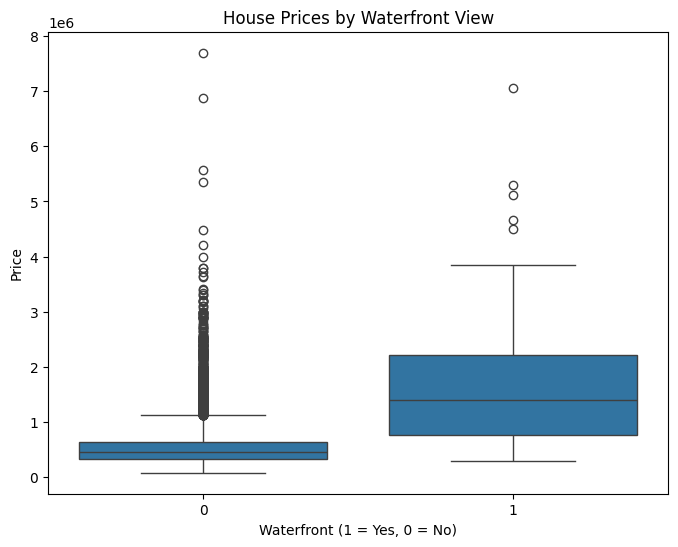

In [21]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='waterfront', y='price', data=df)
plt.title('House Prices by Waterfront View')
plt.xlabel('Waterfront (1 = Yes, 0 = No)')
plt.ylabel('Price')


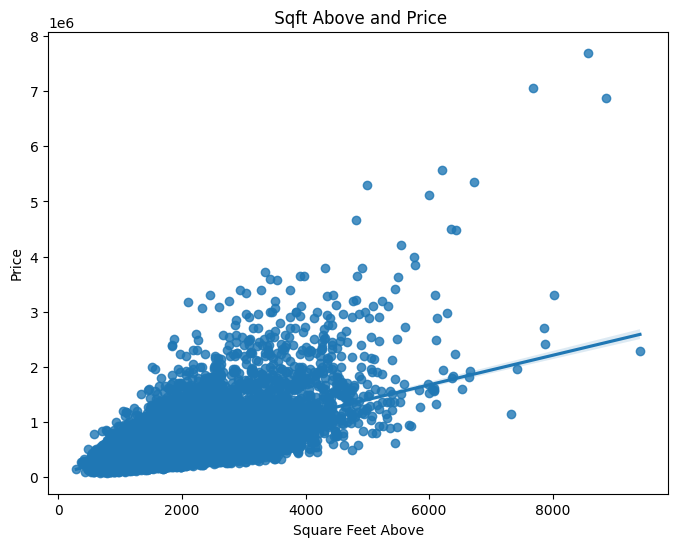

In [22]:
plt.figure(figsize=(8, 6))
sns.regplot(x='sqft_above', y='price', data=df)
plt.title(' Sqft Above and Price')
plt.xlabel('Square Feet Above')
plt.ylabel('Price')

plt.show()

In [75]:
X = df[['sqft_living']]
Y = df['price']
lm = LinearRegression()
lm.fit(X, Y)
print(lm.score(x, y))
Z = df[["floors", "waterfront", "lat", "bedrooms", "sqft_basement","view", "bathrooms", "sqft_living15", "sqft_above", "grade", "sqft_living"]]


0.4928532179037931


In [77]:

Z = df[["floors", "waterfront", "lat", "bedrooms", "sqft_basement", "view", "bathrooms", "sqft_living15", "sqft_above", "grade", "sqft_living"]]
Y = df['price']
Z = Z.dropna()
Y = Y[Z.index]
lm.fit(Z, Y)
print(lm.score(Z, Y))

0.6578373924727967


In [81]:
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('poly', PolynomialFeatures(degree=2)),
    ('model', LinearRegression())
])

pipeline.fit(Z, Y)

Pipeline(steps=[('scaler', StandardScaler()), ('poly', PolynomialFeatures()),
                ('model', LinearRegression())])

In [87]:
X = df[["floors", "waterfront", "lat", "bedrooms", "sqft_basement", "view", "bathrooms", "sqft_living15", "sqft_above", "grade", "sqft_living"]]
y = df['price']
X = X.dropna()
y = y[X.index]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
ridge_model = Ridge(alpha=0.1)
ridge_model.fit(X_train, y_train)
y_pred = ridge_model.predict(X_test)
r2 = r2_score(y_test, y_pred)
print("R^2 Score:", r2)

R^2 Score: 0.6568035759606438


In [88]:
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)
ridge_model = Ridge(alpha=0.1)
ridge_model.fit(X_train_poly, y_train)
y_pred = ridge_model.predict(X_test_poly)
r2 = r2_score(y_test, y_pred)

print("R^2 Score:", r2)

R^2 Score: 0.6905981090863255
